In [1]:
import numpy as np
import librosa
import librosa.display
import ruptures as rpt
import matplotlib.pyplot as plt

In [2]:
# Load FLAC file
file_path = r"C:\Users\nield\Desktop\GitHub\Music-Structure-Analysis\DO NOT TOUCH\Audio Files\Emmanuel\01. Vitalic - Polkamatic.flac"  # Change this to your FLAC file
y, sr = librosa.load(file_path, sr=160000)  # Load with original sampling rate

print(f"Audio duration: {len(y) / sr:.2f} seconds")


Audio duration: 112.95 seconds


In [10]:
# Compute the tempogram (captures tempo changes over time)
tempogram = librosa.feature.tempogram(y=y, sr=sr, hop_length=2048)
signal = tempogram.T  # Transpose so time is the first dimension
feature_used = "Tempogram"


In [4]:
# Extract MFCCs as the feature signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=10, hop_length=1024)
signal = mfcc.T  # Transpose so time is the first dimension
feature_used = "MFCCs"

In [5]:
# Extract RMS energy as the feature signal
rms = librosa.feature.rms(y=y, hop_length=1024)
signal = rms.T
feature_used = "RMS Energy"

In [6]:
# Extract Chroma features as the feature signal
chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=1024)
signal = chroma.T
feature_used = "Chroma Features"

print("Chroma shape:", chroma.shape)  # (12, time_frames)
print(f"Total time in chroma: {librosa.frames_to_time(chroma.shape[1], sr=sr, hop_length=1024):.2f} seconds")


Chroma shape: (12, 17648)
Total time in chroma: 112.95 seconds


Detected Segments using Tempogram (Start Time → End Time in seconds):
0.00 sec → 0.77 sec
0.77 sec → 2.78 sec
2.78 sec → 5.60 sec
5.60 sec → 10.05 sec
10.05 sec → 11.42 sec
11.42 sec → 22.78 sec
22.78 sec → 30.56 sec
30.56 sec → 31.97 sec
31.97 sec → 54.37 sec
54.37 sec → 55.30 sec
55.30 sec → 56.06 sec
56.06 sec → 56.47 sec

Total Segments Detected: 12


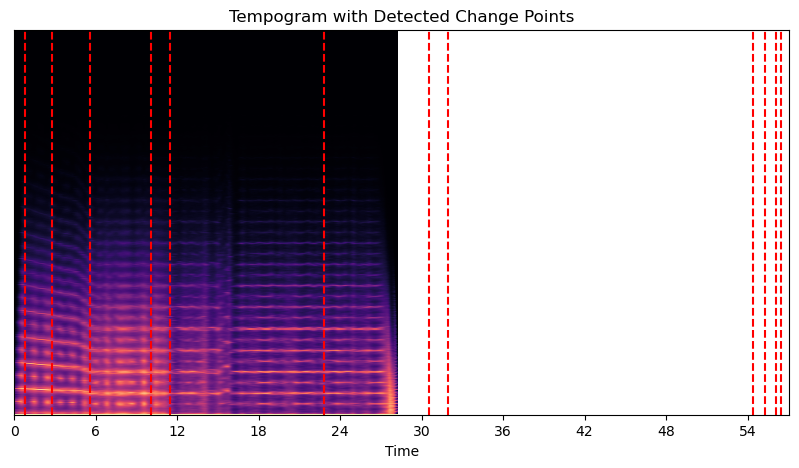

In [11]:
algo = rpt.Binseg(model="l2").fit(signal)
result = algo.predict(n_bkps=11)

# Convert breakpoints from frames to time
bkps_time = librosa.frames_to_time(result, sr=sr, hop_length=1024)
segments = [0] + list(bkps_time)  # Include start point

# Print detected segments with total count
total_segments = len(segments) - 1  # Number of segments
print(f"Detected Segments using {feature_used} (Start Time → End Time in seconds):")

for i in range(total_segments):
    print(f"{segments[i]:.2f} sec → {segments[i + 1]:.2f} sec")
print(f"\nTotal Segments Detected: {total_segments}")

# Display results (Use the last selected feature)
plt.figure(figsize=(10, 5))
if feature_used == "MFCCs":
    librosa.display.specshow(mfcc, x_axis="time", sr=sr)
elif feature_used == "RMS Energy":
    librosa.display.specshow(rms, x_axis="time", sr=sr)
elif feature_used == "Chroma Features":
    librosa.display.specshow(chroma, x_axis="time", sr=sr)
elif feature_used == "Tempogram":
    librosa.display.specshow(tempogram, x_axis="time", sr=sr)

plt.title(f"{feature_used} with Detected Change Points")

for bkpt in bkps_time:
    plt.axvline(x=bkpt, color="r", linestyle="--", label="Change Point")
plt.show()

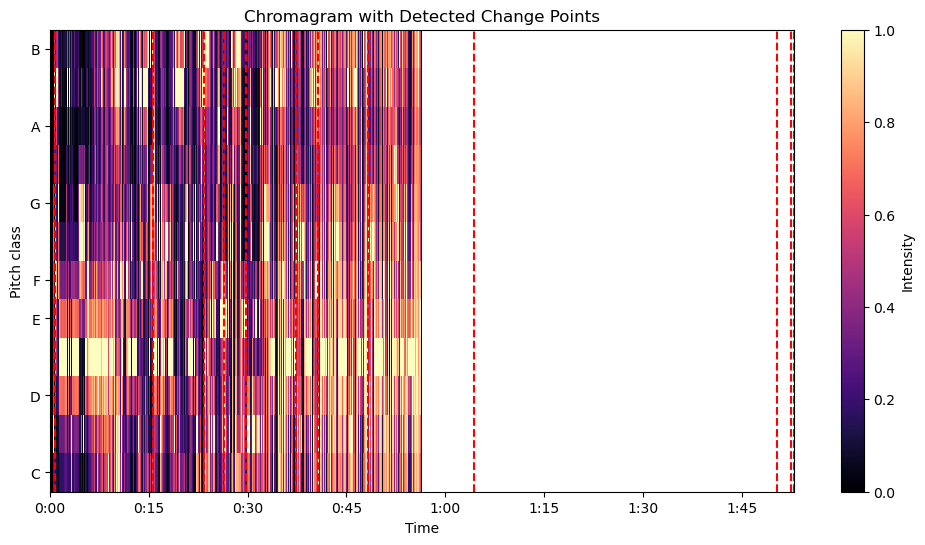

In [8]:
# if used chromagram
plt.figure(figsize=(12, 6))
librosa.display.specshow(chroma, x_axis="time", y_axis="chroma", sr=sr)
plt.title("Chromagram with Detected Change Points")
plt.colorbar(label="Intensity")

# Overlay detected change points
for bkpt in bkps_time:
    plt.axvline(x=bkpt, color="r", linestyle="--", label="Change Point")

plt.xlim([0, len(y) / sr])  # Ensure full time is displayed
plt.show()


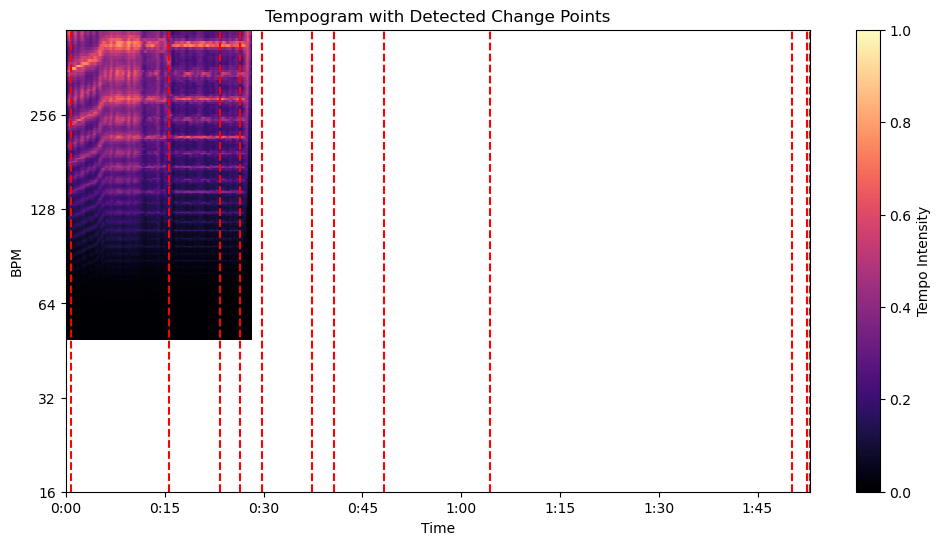

In [9]:
# Display Tempogram with Detected Change Points
plt.figure(figsize=(12, 6))
librosa.display.specshow(tempogram, x_axis="time", y_axis="tempo", sr=sr)
plt.title("Tempogram with Detected Change Points")
plt.colorbar(label="Tempo Intensity")

# Overlay detected change points
for bkpt in bkps_time:
    plt.axvline(x=bkpt, color="r", linestyle="--", label="Change Point")

plt.xlim([0, len(y) / sr])  # Ensure full duration is shown
plt.show()